## (a) - (b) Plotting Position, Velocity, Acceleration and Calculating Average Acceleration

When we take the derivative we get more noise because we are taking samples of the slope of the velocity curve which has the original noise, so taking the derivative of something with noise will amplify the noise. On the other hand, the pos vs time graph is smooth because taking an integral will sum up the space under the noise, which will cancel itself out about the mean of the position. It turns out integrating will average out the larger and smaller velocities.
Mean = 0.474 m/s^2
Standard Deviation = 4.357
Deviation in the Mean = 0.436


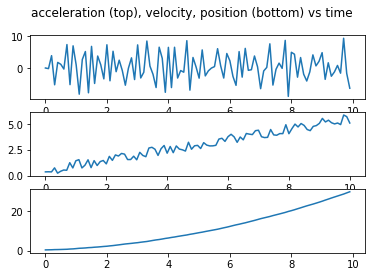

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
velocities = np.loadtxt("velocity.txt")
accels = []
pos = []
times = []

s = 0.5*(velocities[0,1] + velocities[len(velocities)-1,1])
for i in range(0, len(velocities)-1):
    v1 = velocities[i,1]
    v2 = velocities[i+1,1]
    s += velocities[i,1]
    pos.append(s*0.1)
    times.append(velocities[i, 0])
    accels.append((v2 - v1)/0.1)

fig, axs = plt.subplots(3)
fig.suptitle("acceleration (top), velocity, position (bottom) vs time")
axs[0].plot(times, accels)
axs[1].plot(velocities[:, 0], velocities[:, 1])
axs[2].plot(times, pos)
fig.show()
print("When we take the derivative we get more noise because we are taking samples of the slope of the velocity curve which has the original noise, so taking the derivative of something with noise will amplify the noise. On the other hand, the pos vs time graph is smooth because taking an integral will sum up the space under the noise, which will cancel itself out about the mean of the position. It turns out integrating will average out the larger and smaller velocities.")
# axs[2].set_title("position vs. time")
# axs[2].plot(po, velocities[:, 1])

# Plot and print results
asum = 0.0
N = len(accels)
for i in range(N):
    asum += accels[i]
mean = asum / N
asquaredsum = 0.0
for i in range(N):
    asquaredsum += accels[i]**2

asquaredmean = asquaredsum / N
stddev = sqrt(asquaredmean - mean**2)
devMean = stddev / sqrt(N)
print("Mean = {:.3f} m/s^2".format(mean))
print("Standard Deviation = {:.3f}".format(stddev))
print("Deviation in the Mean = {:.3f}".format(devMean))

np.savetxt("position.txt", np.column_stack([times,pos]))

## (c) Polynomial fit to position data

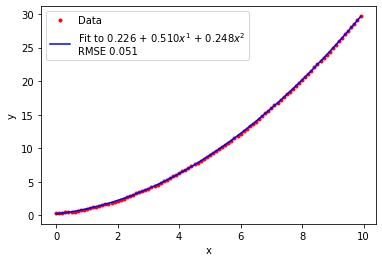

In [4]:
from solvematrix import solvematrix
from numpy import zeros, loadtxt, linspace
from pylab import plot, show, xlabel, ylabel, legend
from math import sqrt

v0 = 3.557444180270500356e-01 ##from dataset

# load and parse data
data = loadtxt("position.txt", float)  # import data
x = data[:,0]                       # x data
y = data[:,1]                       # y data
N = len(x)                          # number of data points

# Fit parameters
degree = 2                             # polynomial degree
A = zeros([degree+1, degree+1], float)  # empty matrix
v = zeros(degree+1, float)              # empty vector

# Rows i, columns j
for i in range(degree+1):
    v[i] = sum(y*x**i)              # vector
    for j in range(degree+1):   
        A[i,j] = sum(x**(i+j))      # matrix
a = solvematrix(A,v)                # calculate the fit coefficients

def f(x):
    p = 0
    for i in range(degree+1):
        p += a[i]*x**i
    return p

# Generate polynomial curve
M = 100                             # number of points for curve
xpol = linspace(x[0], x[-1], M)     # x values
ypol = zeros(M, float)              # initialize y values
for n in range(degree + 1):
    ypol += a[n]*xpol**n            # add each term in polynomial

s = 0.0
for i in range(len(y)):
    s+=(y[i] - f(x[i]))**2

rmse = sqrt(s / N)
fitstr = "Fit to %.3f" % a[0]
for i in range(1, degree+1):
        fitstr += " + %.3f$x^{i}$".format(i=i) % a[i]
fitstr += "\nRMSE %.3f" % rmse
# Plot results
plot(x,y, "r.", label="Data")
plot(xpol, ypol,"b-", label=fitstr)
xlabel("x")
ylabel("y")
legend(loc="upper left")
show()
##fitting the position data we can see that the acceleration is 0.496 m/s^2 which is close to the actual acceleration. I multiplied the x^2 term by two because there is really a factor 1/2 in there from the 0.5at^2 part of the newtownian equation